<a href="https://colab.research.google.com/github/shilphypg/DSA_ICTAK/blob/main/ShilphyPGonsalvez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
#mount from google drive so that the file will be permanently available in drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import numpy as np # Import the numpy library for numerical operations
import pandas as pd # Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import seaborn as sns # Import the seaborn library for enhanced visualizations

In [131]:
path='/content/drive/MyDrive/RCourse/titanic_dataset for preprocessing.csv' # Define the path to the CSV file containing the dataset
df=pd.read_csv(path) #reading the path and asigning variable

In [132]:
# Explore the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [133]:
# Set 'PassengerId' as the index column
df.set_index('PassengerId', inplace=True)

In [134]:
df.head() #to display the fist 5 rows of the datasett

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###EXPLORATORY DATA ANALYSIS

In [135]:
# General information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [136]:
# Basic statistics
print("\nBasic statistics of numerical columns:")
print(df.describe())


Basic statistics of numerical columns:
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [137]:
import plotly.express as px # Import the Plotly Express library for creating interactive plots

In [138]:
# Age distribution
age_hist = px.histogram(df, x='Age', nbins=50, title='Age Distribution')
age_hist.show()

In [139]:
# Age distribution
embarked_hist = px.histogram(df, x='Embarked', nbins=20, title='Embarked Distribution')
embarked_hist.show()

In [140]:
# Fare distribution
fare_hist = px.histogram(df, x='Fare', nbins=50, title='Fare Distribution')
fare_hist.show()

In [141]:
# Pie chart for survival status
survival_pie = px.pie(df, names='Survived', title='Survival Status', labels={'survived': 'Survived'},
                      color_discrete_sequence=px.colors.qualitative.Set3)
survival_pie.show()

In [142]:
df.columns #to list the column names

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [143]:
# Bar chart for survival count by passenger class
survival_bar_class = px.bar(df.groupby(['Pclass', 'Survived']).size().reset_index(name='count'),
                            x='Pclass', y='count', color='Survived', barmode='group',
                            title='Survival Count by Passenger Class',
                            labels={'pclass': 'Passenger Class', 'survived': 'Survived', 'count': 'Count'})
survival_bar_class.show()

In [144]:
# Cabin distribution
cabin_hist = px.histogram(df, x='Cabin', nbins=50, title='Cabin Distribution')
cabin_hist.show()

In [145]:
df.isna().sum() #to check the missing values

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


To check whether Embarked field is filled with Mean, Median , Mode

In [146]:
# Fill missing values in 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True) #Median is used since the data is skewed or contains outliers.

# Fill missing values in 'Cabin' with a placeholder (e.g., 'Unknown')
df['Cabin'].fillna('Unknown', inplace=True) #Imputation with a Placeholder: Replace missing values with a placeholder like 'Unknown' or 'Not Available'. This method is simple and ensures that you have no missing values.

# Fill missing values in 'Embarked' with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [147]:
df.isna().sum() #to check the missing values

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [148]:
df.Survived.value_counts() #to check the count of the target variable

,count
Survived,
0,549
1,342


In [149]:
df.columns #to list the column names

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

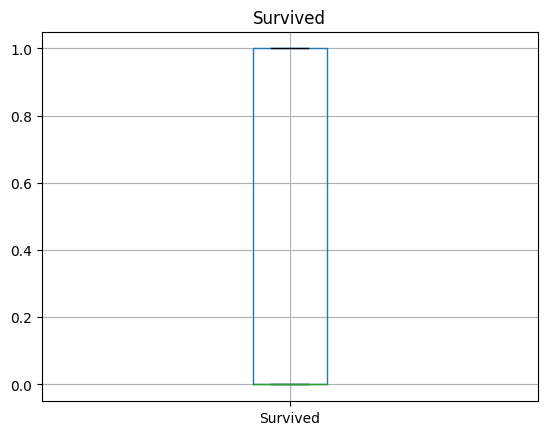

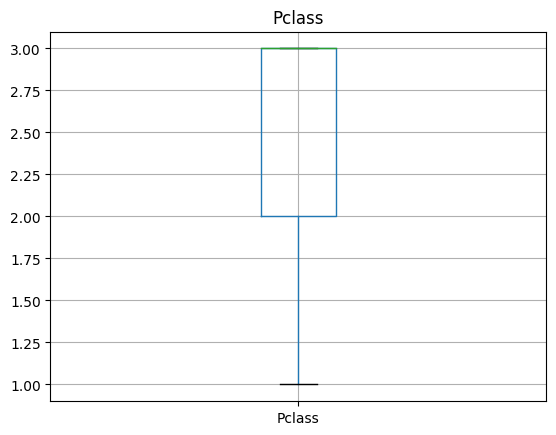

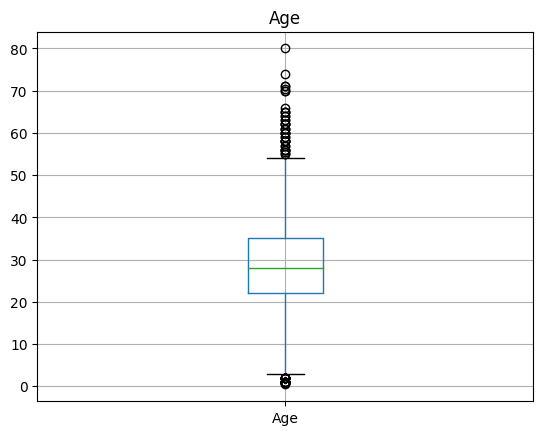

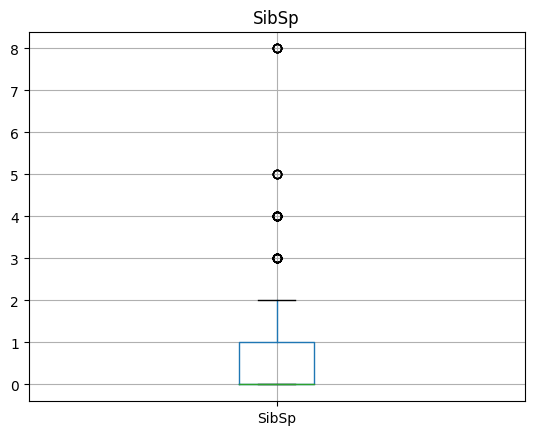

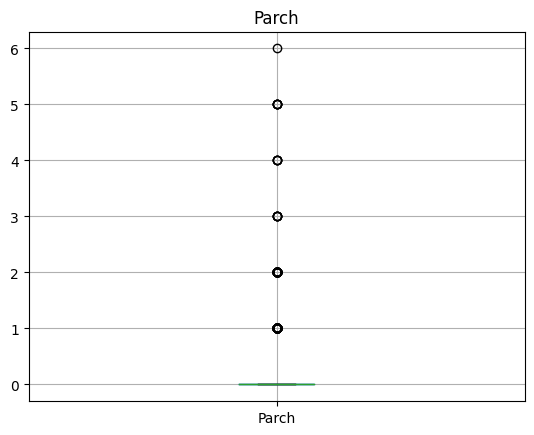

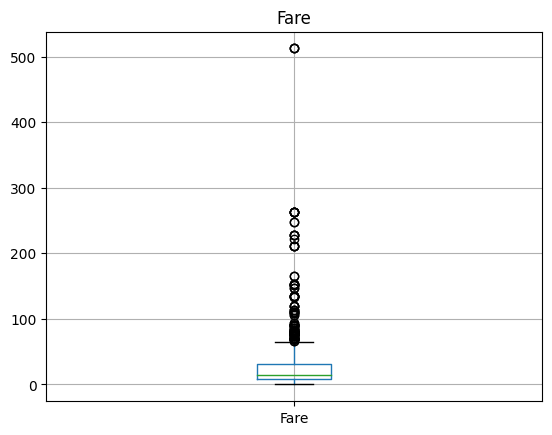

In [150]:
for col in df.columns: # defining functions to plot the outliers of each columns
  if df[col].dtype != 'object':
    plt.figure()
    df.boxplot([col.strip()])
    plt.title(col)

In [151]:
## IQR- to remove the outliers of each column by defining functions

for col in df.columns:
  if df[col].dtype != 'object':
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.75)

    ## find iqr
    iqr = q2 - q1

    ## upper bound and lower bound
    upper = q2 + 1.5*iqr
    lower = q1 - 1.5*iqr

    df[col] = np.where(df[col] > upper, upper, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

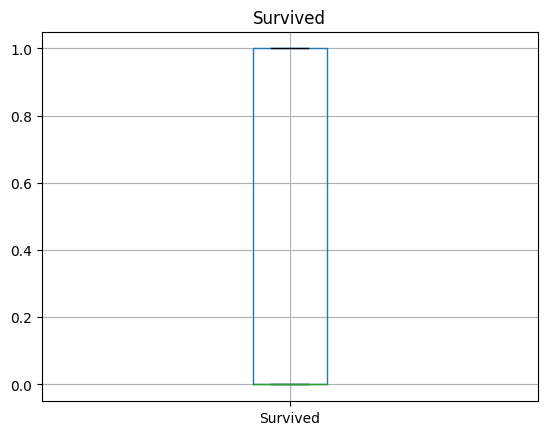

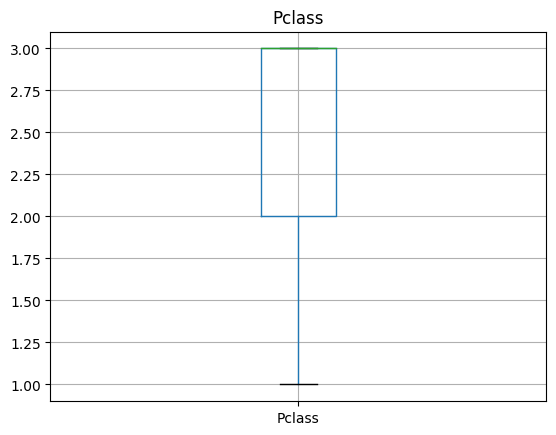

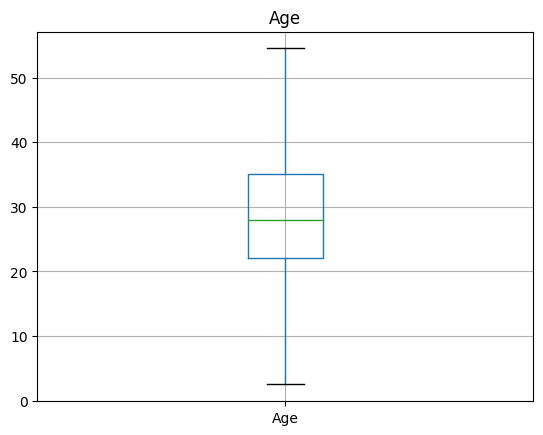

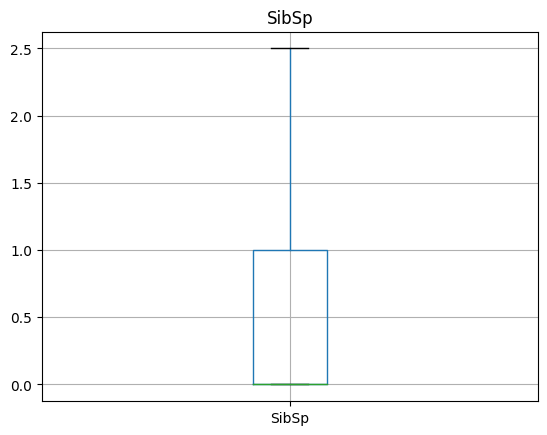

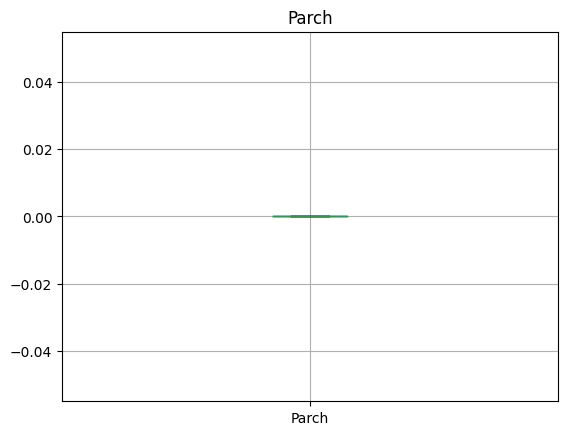

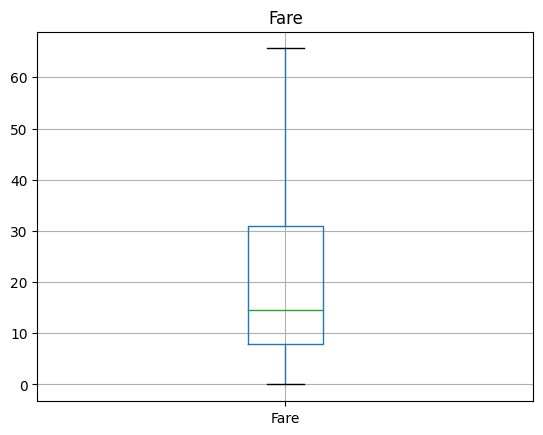

In [152]:
#Again check for outliers
for col in df.columns:
  if df[col].dtype != 'object':
    plt.figure()
    df.boxplot([col])
    plt.title(col)

In [153]:
from sklearn.preprocessing import MinMaxScaler  # Import the MinMaxScaler class from the sklearn.preprocessing module

# Define the features and target
features = df.drop('Survived', axis=1)
target = df['Survived']

# Apply Min-Max scaling to the feature set
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features.select_dtypes(include=['float64', 'int64']))

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, index=features.index, columns=features.select_dtypes(include=['float64', 'int64']).columns)

# Display the scaled feature set
print(scaled_features_df.head())

             Pclass       Age  SibSp  Parch      Fare
PassengerId                                          
1               1.0  0.375000    0.4    0.0  0.110460
2               0.0  0.682692    0.4    0.0  1.000000
3               1.0  0.451923    0.0    0.0  0.120745
4               0.0  0.625000    0.4    0.0  0.809027
5               1.0  0.625000    0.0    0.0  0.122649


In [154]:
# Combine the scaled features with the non-scaled categorical features
# Assuming we have scaled_features_df from previous steps
final_df = pd.concat([scaled_features_df, df[['Survived', 'Sex', 'Embarked', 'Cabin', 'Name', 'Ticket']]], axis=1)

# Save the final DataFrame to a new CSV file
final_df.to_csv('processed_titanic_dataset.csv', index=True)

# Display a message to indicate that the processing is complete
print("Data preprocessing complete. The final dataset has been saved as 'processed_titanic_dataset.csv'.")


Data preprocessing complete. The final dataset has been saved as 'processed_titanic_dataset.csv'.


This assignment demonstrates the essential steps in data preprocessing, which include handling missing data, identifying and managing outliers, and normalizing features for modeling. These preprocessing steps are critical in preparing the data for further analysis or machine learning tasks. The final dataset is now clean and ready for modeling.